# Developer guide to test alternative cell detection within the CellMap pipeline

Here is a notebook to help you modify the block processing function

## Default cell detection

In [12]:
import matplotlib.pyplot as plt
import napari

v = napari.Viewer()

from ClearMap.ImageProcessing.Experts.Cells import detect_cells
from skimage.data import cells3d
import pandas as pd

test_data = cells3d()[:, 1]
sink = detect_cells(test_data)
cells_df = pd.DataFrame(sink)
cells_df

masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.
masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.
masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.
masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watersheddin

,x,y,z,size,source,background_correction
0,0,0,22,10,7777.0,3984.0
1,0,0,38,46,7872.0,3985.0
2,0,0,67,64,8583.0,4411.0
3,0,3,14,105,7160.0,3605.0
4,0,3,21,49,7066.0,3462.0
...,...,...,...,...,...,...
28280,59,254,232,143,6307.0,3605.0
28281,59,255,193,33,6734.0,3083.0
28282,59,255,201,4,7398.0,4506.0
28283,59,255,245,34,7018.0,4032.0


In [3]:
# Visualize in napari
v.add_image(test_data, name="test data")
v.add_points(
    cells_df[["x", "y", "z"]],
    properties=cells_df[cells_df.columns.difference(["x", "y", "z"])],
    out_of_slice_display=False,
    face_color="size",
    size=3,
    name="detected cells"
)

<Points layer 'detected cells' at 0x7f6bbbbc7f10>

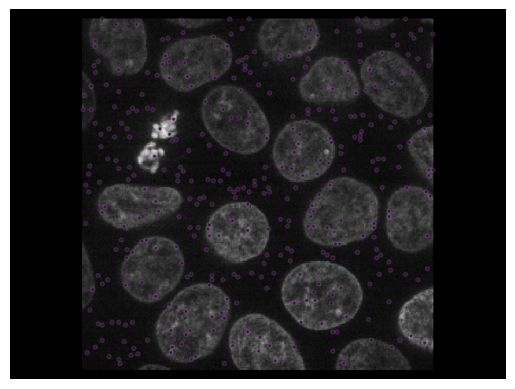

In [4]:
plt.imshow(v.screenshot())
plt.axis("off");

## Modify detection parameters

In [2]:
import matplotlib.pyplot as plt
import napari

v = napari.Viewer()

from ClearMap.ImageProcessing.Experts.Cells import (
    detect_cells,
    default_cell_detection_parameter,
)
from skimage.data import cells3d
import pandas as pd


test_data = cells3d()[:, 1]

cell_detection_parameter = default_cell_detection_parameter.copy()
cell_detection_parameter["dog_filter"].update(
    {"shape": [5, 5, 5], "sigma": [5, 5, 5], "sigma2": [2, 2, 2]}
)
print(cell_detection_parameter)

sink = detect_cells(test_data, cell_detection_parameter=cell_detection_parameter)
pd.DataFrame(sink)

{'illumination_correction': {'flatfield': None, 'scaling': 'mean'}, 'background_correction': {'shape': (10, 10), 'form': 'Disk', 'save': False}, 'equalization': None, 'dog_filter': {'shape': [5, 5, 5], 'sigma': [5, 5, 5], 'sigma2': [2, 2, 2]}, 'maxima_detection': {'h_max': None, 'shape': 5, 'threshold': 0, 'valid': True, 'save': False}, 'shape_detection': {'threshold': 700, 'save': False}, 'intensity_detection': {'method': 'max', 'shape': 3, 'measure': ['source', 'background_correction']}}
masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.


/home/etienne.doumazane/code/ClearAnatomics/ClearMap/ClearMap/Analysis/Measurements/shape_detection.py:159: UserWarning: Received an uint source using the full range of available values. We had to clip upper values to 65534 before shifting intensity by 1.
  warnings.warn(f'Received an uint source using the full range of available values. We had to clip upper values to {max_val-1} before shifting intensity by 1.')


masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.


/home/etienne.doumazane/code/ClearAnatomics/ClearMap/ClearMap/Analysis/Measurements/shape_detection.py:159: UserWarning: Received an uint source using the full range of available values. We had to clip upper values to 65534 before shifting intensity by 1.
  warnings.warn(f'Received an uint source using the full range of available values. We had to clip upper values to {max_val-1} before shifting intensity by 1.')


masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.


/home/etienne.doumazane/code/ClearAnatomics/ClearMap/ClearMap/Analysis/Measurements/shape_detection.py:159: UserWarning: Received an uint source using the full range of available values. We had to clip upper values to 65534 before shifting intensity by 1.
  warnings.warn(f'Received an uint source using the full range of available values. We had to clip upper values to {max_val-1} before shifting intensity by 1.')


masking maxima centers by (dog > 700) for shape detection
Filtering centers for correct block processing.
Received uint source array with 0 values. To avoid inconsistent results in watershedding, we need to shift the source intensity by 1 prior to taking its opposite.


/home/etienne.doumazane/code/ClearAnatomics/ClearMap/ClearMap/Analysis/Measurements/shape_detection.py:159: UserWarning: Received an uint source using the full range of available values. We had to clip upper values to 65534 before shifting intensity by 1.
  warnings.warn(f'Received an uint source using the full range of available values. We had to clip upper values to {max_val-1} before shifting intensity by 1.')


,x,y,z,size,source,background_correction
0,0,0,30,10,6544.0,2561.0
1,0,0,43,5,5880.0,2181.0
2,0,1,55,5,6544.0,2418.0
3,0,2,13,37,6402.0,3604.0
4,0,5,66,7,6829.0,2656.0
...,...,...,...,...,...,...
51347,59,251,192,24,6402.0,3083.0
51348,59,252,242,39,5643.0,2987.0
51349,59,252,251,6,4647.0,2181.0
51350,59,254,220,4,5264.0,1992.0


## Modify block the processing function
Create and modify [this script](custom_cells.py)

In [21]:
import matplotlib.pyplot as plt
import napari

v = napari.Viewer()

from ClearMap.Scripts.custom_cells import (
    detect_cells,
    custom_detect_cells_block,
    default_cell_detection_parameter,
)
from skimage.data import cells3d
import pandas as pd

test_data = cells3d()[:, 1]

In [22]:
sink = detect_cells(
    test_data,
    block_detection_function=custom_detect_cells_block,
    cell_detection_parameter=default_cell_detection_parameter,
)
cells_df = pd.DataFrame(sink)
cells_df

,x,y,z,size,source,background_correction
0,39,87,53,24674,65535.0,28599.0
1,36,137,41,15953,41113.0,42836.0
2,33,182,50,13756,42394.0,33177.0
3,35,18,24,12739,45903.0,26870.0
4,31,186,2,12261,23378.0,1919.0
5,39,79,61,26602,65535.0,11244.0
6,38,136,63,16242,31724.0,10102.0
7,34,180,62,13666,32720.0,11384.0


In [25]:
# Visualize in napari
v.add_image(test_data, name="test data")
v.add_points(
    cells_df[["x", "y", "z"]],
    properties=cells_df[cells_df.columns.difference(["x", "y", "z"])],
    out_of_slice_display=True,
    face_color="size",
    # size=10,
    name="detected cells"
)

<Points layer 'detected cells [1]' at 0x7f2dc5a368d0>